WELCOME TO THE COUNTRY DEVELOPMENT CLASSIFYING MODEL! 
Enter Country Name: India
             City   Population( in million)  Sanitation  \
0        New Delhi                     11.1         9.1   
1           Mumbai                     12.2         8.1   
2             Pune                      3.1         8.4   
3        Bengaluru                      8.4         8.6   
4          Kolkata                      4.4         7.5   
5        Hyderabad                      6.7         8.6   
6         Warangal                      0.8         6.2   
7           Bhopal                      1.7         5.5   
8          Lucknow                      2.8         4.3   
9      Bhubaneswar                      0.8         8.3   
10          Mysore                      0.9         9.2   
11          Jaipur                      3.0         7.9   
12           Surat                      4.4         7.1   
13       Allahabad                      1.1         3.2   
14        Durgapur                

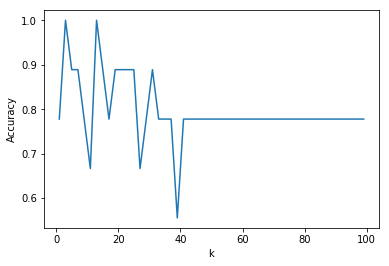

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter


print("WELCOME TO THE COUNTRY DEVELOPMENT CLASSIFYING MODEL! ")


cname = input('Enter Country Name: ')


df = pd.read_csv(cname+'.csv') 
df.replace('?',-99999,inplace = True)#replacing missing values denoted by '?' with -99999 in df variable itself
print(df)
print('\n')
df.drop(['City '],axis=1,inplace=True)
df.drop(['Population( in million)'],axis=1,inplace=True)
full_data = df.astype(float,errors='ignore').values.tolist()
print(full_data)
print('\n')


import random
random.shuffle(full_data)
test_size = 0.2
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
print('Full data size: {}'.format(len(full_data)))
print('\n')
print("Training data size: {}".format(len(train_data)))
print('\n')
print("Testing data size: {}".format(len(test_data)))
print('\n')


train_set = {'Developed':[] , 'Not Developed':[]} #Training Set
test_set = {'Developed':[] , 'Not Developed':[]} #Testing Set
for i in train_data:
    train_set[i[-1]].append(i[:-1])    
for i in test_data:
    test_set[i[-1]].append(i[:-1]) 
print(train_set)
print('\n')


def knn(data,predict,k=3): #KNN FUNCTIOM
    distances = []
    for group in data:
        for features in data[group]:
            distance = math.sqrt((features[0]-predict[0])**2 +(features[1]-predict[1])**2)
            distances.append([distance,group])
    votes = [i[1] for i in sorted(distances)[0:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

datax=[8.2,8.4,7.9,8.2,8.5,8.7] 

b= knn(train_set,datax,5)
print(f"The State of the Country is {b}")
print('\n')

accuracy = [] #ACCURACY LIST
z = [i for i in range(1,100,2)] #list of all values of k used below
for k in range(1,100,2):
    correct = 0
    total = len(test_data)
    for group in test_set:
        for data in test_set[group]: #data contains a list of 9 features x1,x2...x9
            vote = knn(train_set,data,k) #we check classification made by knn for data variable
            if group == vote: #if group of data variable = classification made by knn then correct += 1
                correct+=1
    accuracy.append(correct/total)

    
print("Maximum Accuracy Of Model is: {}".format(max(accuracy))) #Printing maximum accuracy  
print('\n')
print("Value of k: {}".format(z[accuracy.index(max(accuracy))])) #First value of k for which it occurs
print('\n')
      
#PLOTTING ACCURACY VS. K graph 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(z,accuracy) 
plt.show() #shows the plot